In [15]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [16]:
logs = pd.read_csv(r'data files/logs.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
logs.head(5)

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,1,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,603,Player selects avatar,Avatar Creation,3M 30S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,604,Player commits to avatar and name,Avatar Creation,4M 12S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cols = ['skill_level_know','skill_level_priority',"skill_level_refusal","skill_level_me","skill_level_people","event_time_dbl","event_id","player_id","avatar_age", "avatar_gender"]
logs = logs[cols]

In [19]:
logs = logs.fillna(method="ffill")

In [20]:
logs2 = logs[logs["event_id"]==200]

In [21]:
logs2

,skill_level_know,skill_level_priority,skill_level_refusal,skill_level_me,skill_level_people,event_time_dbl,event_id,player_id,avatar_age,avatar_gender
178,0.0,0.0,0.0,6.0,0.0,881,200,6427001,13.0,Male
1429,1.0,3.0,0.0,6.0,2.0,3796,200,6427001,13.0,Male
1860,3.0,3.0,0.0,6.0,3.0,4730,200,6427001,13.0,Male
2428,3.0,3.0,2.0,9.0,5.0,6367,200,6427001,13.0,Male
3199,5.0,6.0,7.0,12.0,6.0,8245,200,6427001,13.0,Male
...,...,...,...,...,...,...,...,...,...,...
2103292,6.0,9.0,3.0,9.0,6.0,1618,200,65670032,12.0,Male
2103587,6.0,9.0,9.0,12.0,6.0,2252,200,65670032,12.0,Male
2103851,6.0,9.0,12.0,18.0,6.0,2687,200,65670032,12.0,Male
2104830,6.0,9.0,12.0,18.0,17.0,3513,200,65670032,12.0,Male


In [29]:
group_player = logs.groupby(["player_id", "avatar_gender"]).max()

In [30]:
group_player

skill_level_know  skill_level_priority  \
player_id avatar_gender                                           
6427001   Male                       30.0                  30.0   
6427002   Female                     30.0                  30.0   
          Male                       30.0                  30.0   
6427004   Female                     29.0                  29.0   
6427005   Female                     29.0                  29.0   
...                                   ...                   ...   
7540835   Female                     15.0                  13.0   
          Male                       15.0                  13.0   
65670031  Female                     26.0                  30.0   
65670032  Female                     26.0                  30.0   
          Male                       26.0                  30.0   

                         skill_level_refusal  skill_level_me  \
player_id avatar_gender                                        
6427001   Male                          26.0            30.0   
6427002   Female                        26.0            30.0   
          Male                          26.0            30.0   
6427004   Female                        28.0            30.0   
6427005   Female                        28.0            30.0   
...                                      ...             ...   
7540835   Female                        18.0            27.0   
          Male                          18.0            27.0   
65670031  Female                        30.0            30.0   
65670032  Female                        30.0            30.0   
          Male                          30.0            30.0   

                         skill_level_people  event_time_dbl  event_id  \
player_id avatar_gender                                                 
6427001   Male                         29.0           37718      1005   
6427002   Female                       29.0            3735      1005   
          Male                         29.0             157       600   
6427004   Female                       29.0           30307      1005   
6427005   Female                       29.0             201       600   
...                                     ...             ...       ...   
7540835   Female                       15.0             535       708   
          Male                         15.0               3       600   
65670031  Female                       27.0           11100      1005   
65670032  Female                       27.0               2       600   
          Male                         27.0            5767      1005   

                         avatar_age  
player_id avatar_gender              
6427001   Male                 13.0  
6427002   Female               13.0  
          Male                 13.0  
6427004   Female               13.0  
6427005   Female               13.0  
...                             ...  
7540835   Female               14.0  
          Male                 14.0  
65670031  Female               12.0  
65670032  Female               12.0  
          Male                 12.0  

[241 rows x 8 columns]

In [33]:
group_gender = group_player.groupby(["avatar_gender", "avatar_age"]).mean()

In [34]:
group_gender

skill_level_know  skill_level_priority  \
avatar_gender avatar_age                                           
Female        11.0               21.291667             22.333333   
              12.0               22.147059             25.000000   
              13.0               23.000000             24.433333   
              14.0               21.750000             23.000000   
Male          11.0               16.541667             19.083333   
              12.0               24.275862             26.896552   
              13.0               21.500000             24.029412   
              14.0               22.315789             24.894737   

                          skill_level_refusal  skill_level_me  \
avatar_gender avatar_age                                        
Female        11.0                  22.208333       26.083333   
              12.0                  24.117647       26.705882   
              13.0                  24.000000       26.600000   
              14.0                  23.285714       26.000000   
Male          11.0                  18.458333       23.750000   
              12.0                  25.586207       28.103448   
              13.0                  21.911765       26.029412   
              14.0                  24.394737       27.684211   

                          skill_level_people  event_time_dbl    event_id  
avatar_gender avatar_age                                                  
Female        11.0                 20.833333    99360.458333  886.916667  
              12.0                 22.500000   237155.647059  862.058824  
              13.0                 23.266667    84517.300000  870.200000  
              14.0                 22.285714   186685.642857  849.821429  
Male          11.0                 17.416667   123215.416667  836.458333  
              12.0                 24.310345    95836.689655  907.413793  
              13.0                 21.911765   179949.235294  897.794118  
              14.0                 23.184211    87531.500000  898.421053

In [37]:
group_gender2 = group_gender.reset_index()

In [38]:
group_gender2

,avatar_gender,avatar_age,skill_level_know,skill_level_priority,skill_level_refusal,skill_level_me,skill_level_people,event_time_dbl,event_id
0,Female,11.0,21.291667,22.333333,22.208333,26.083333,20.833333,99360.458333,886.916667
1,Female,12.0,22.147059,25.000000,24.117647,26.705882,22.500000,237155.647059,862.058824
2,Female,13.0,23.000000,24.433333,24.000000,26.600000,23.266667,84517.300000,870.200000
3,Female,14.0,21.750000,23.000000,23.285714,26.000000,22.285714,186685.642857,849.821429
4,Male,11.0,16.541667,19.083333,18.458333,23.750000,17.416667,123215.416667,836.458333
5,Male,12.0,24.275862,26.896552,25.586207,28.103448,24.310345,95836.689655,907.413793
6,Male,13.0,21.500000,24.029412,21.911765,26.029412,21.911765,179949.235294,897.794118
7,Male,14.0,22.315789,24.894737,24.394737,27.684211,23.184211,87531.500000,898.421053


In [42]:
fem = group_gender2["avatar_gender"] == "Female"
mal = group_gender2["avatar_gender"] == "Male"

Text(1, 1, 'Skill Level Priority split by Gender')

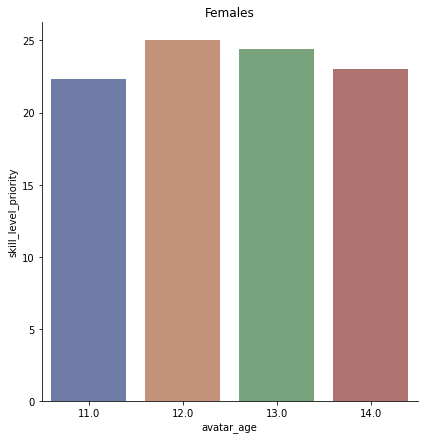

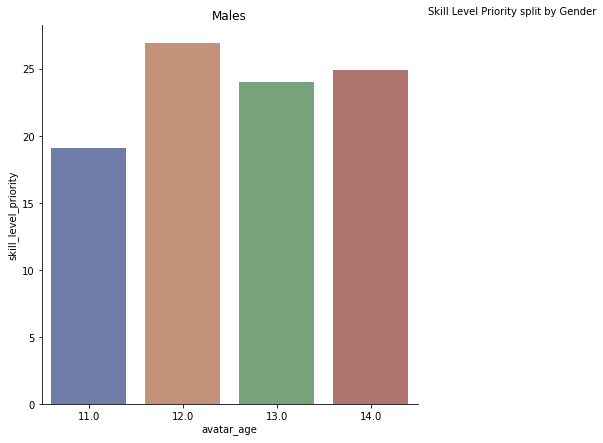

In [56]:
g = sns.catplot(
    data=group_gender2[fem], kind="bar",
    x="avatar_age", y="skill_level_priority",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Females')

g = sns.catplot(
    data=group_gender2[mal], kind="bar",
    x="avatar_age", y="skill_level_priority",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Males')

g.fig.text(1,1, 'Skill Level Priority split by Gender')

Text(1, 1, 'Skill Level Know split by Gender')

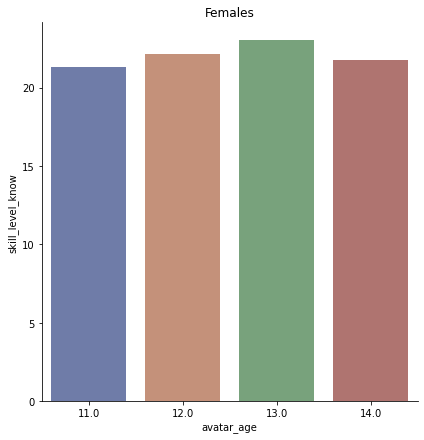

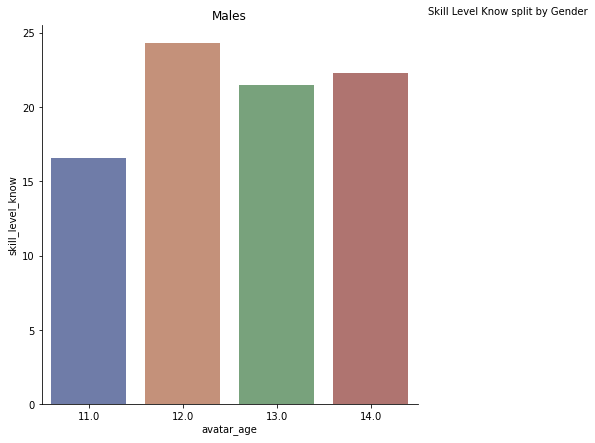

In [57]:
g = sns.catplot(
    data=group_gender2[fem], kind="bar",
    x="avatar_age", y="skill_level_know",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Females')

g = sns.catplot(
    data=group_gender2[mal], kind="bar",
    x="avatar_age", y="skill_level_know",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Males')

g.fig.text(1,1, 'Skill Level Know split by Gender')

Text(1, 1, 'Skill Level Refusal split by Gender')

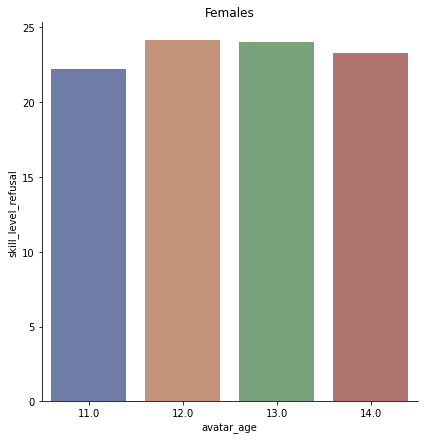

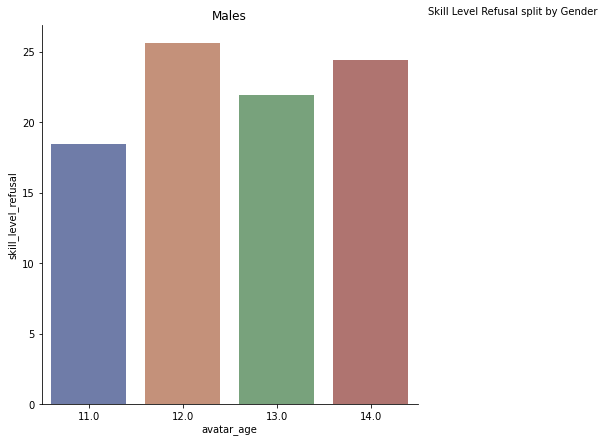

In [58]:
g = sns.catplot(
    data=group_gender2[fem], kind="bar",
    x="avatar_age", y="skill_level_refusal",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Females')

g = sns.catplot(
    data=group_gender2[mal], kind="bar",
    x="avatar_age", y="skill_level_refusal",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Males')

g.fig.text(1,1, 'Skill Level Refusal split by Gender')

Text(1, 1, 'Skill Level People split by Gender')

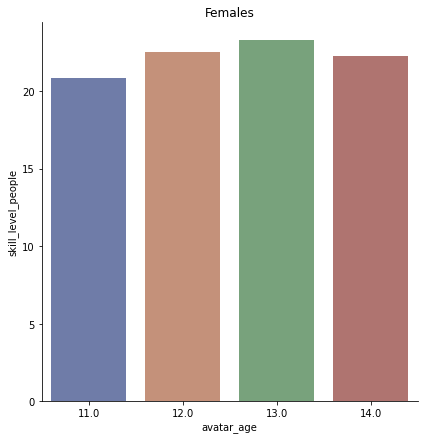

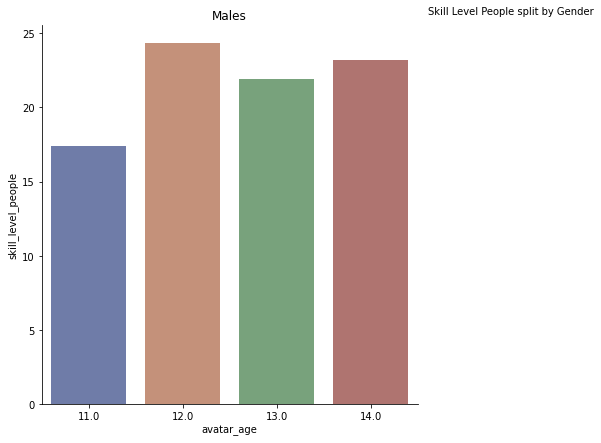

In [59]:
g = sns.catplot(
    data=group_gender2[fem], kind="bar",
    x="avatar_age", y="skill_level_people",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Females')

g = sns.catplot(
    data=group_gender2[mal], kind="bar",
    x="avatar_age", y="skill_level_people",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Males')

g.fig.text(1,1, 'Skill Level People split by Gender')